## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# BUSINESS PROBLEM


In [ ]:
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don't know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new studio can use to help decide what type of films to create.

# START BY REVIEWING AND GETTING TO INTERACT WITH THE DATA

##  Loading the data
here we import required python packages

In [73]:
# Your code here -remember to use markdown cells for comments as well!
#importing python library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
conn = sqlite3.connect

# BOM.MOVIE_GROSS
## Data Insights
start by having a look at what type of data is in the bom.movie_gross

In [8]:
#for easy memorability we will refer to the data from bom.movie_gross as movie_gross
movie_gross = pd.read_csv("bom.movie_gross.csv")
movie_gross
# The view of the data is as shown below

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [9]:
# a tuple representing the dimensionality  (in `(rows, columns)` ) of the DataFrame.
movie_gross.shape

(3387, 5)

In [10]:
#To get a concise summary of the dataframe i.e column names, the number of non-null values in each column, and its data type
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [11]:
movie_gross.describe()
#generate a summary of descriptive statistics for the numerical (domestic_gross)column in the dataset.

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [12]:
type(movie_gross)
#this determines the type of an object.

pandas.core.frame.DataFrame

In [13]:
len(movie_gross['studio'].unique())
#checking the total number of studios


258

#  Data cleaning 
In data cleaning we identify and correct or remove errors, inconsistencies, and inaccuracies from a dataset

Here we look for the missing data, outliers,duplicates,Standardizing data and correcting errors we come across our data 

### Identifying with missing values
Identify missing or null values in a DataFrame. using 'isna()'
True values are treated as 1 and False values are treated as 0.

In [14]:
movie_gross.isna().sum()
# to count the number of missing values in each column

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

### Handling the missing values in domestic_gross column
Observation: there are  missing values  in domestic_gross column (28)
Desicion : replace them  with  mean

In [15]:
mean_value = movie_gross['domestic_gross'].mean()
movie_gross['domestic_gross'].fillna(mean_value, inplace = True)
#replacing the missing values in domestic column with the mean of domestic_gross

## Rechecking the missing values in the  all columns(all missing values in the domestic_gross column are replaced)
movie_gross.isna().sum()

### Handling the missing values in studio column
Observation: there are  missing values  in studio column (5)
Desicion : replace them  with  most frequently occurring value in a set of data.

In [12]:
movie_gross['studio'].fillna(movie_gross['studio'].mode()[0], inplace = True)

In [17]:
## counterchecking if there is still missing values in studio
movie_gross.isna().sum()

title                0
studio               5
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [18]:
movie_gross.duplicated().value_counts()
#it shows there is no duplicated data

False    3387
dtype: int64

In [19]:
# Access to the column labels of the DataFrame.
movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

# ANALYSIS 
## Grouping the studio column by domestic_gross column

In [20]:
studio_data = movie_gross.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)
studio_data
# here we grouping the studio data by domestic_gross and we want the grouping in ascending order

studio
BV            1.841903e+10
Uni.          1.290239e+10
WB            1.216805e+10
Fox           1.094950e+10
Sony          8.488429e+09
                  ...     
TAFC          4.600000e+03
Hiber         3.600000e+03
ALP           2.800000e+03
Synergetic    2.400000e+03
DR            8.000000e+02
Name: domestic_gross, Length: 257, dtype: float64

In [21]:
top_10_studios = studio_data[:10]
top_10_studios
#these are the top 10 best selling studios withing the country( considering the domestic gross)

studio
BV         1.841903e+10
Uni.       1.290239e+10
WB         1.216805e+10
Fox        1.094950e+10
Sony       8.488429e+09
Par.       7.685871e+09
LGF        4.147709e+09
WB (NL)    3.995700e+09
LG/S       2.078200e+09
P/DW       1.682900e+09
Name: domestic_gross, dtype: float64

## A GRAPH  TO SHOW THE MOST PERFORMING STUDIOS CONSIDERING THE DOMESTIC GROSS

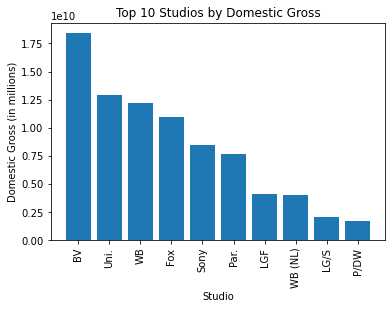

In [22]:
#HOW TO PLOT A BAR GRAPH
plt.bar(top_10_studios.index, top_10_studios.values)
plt.xticks(rotation=90)
plt.xlabel('Studio')
plt.ylabel('Domestic Gross (in millions)')
plt.title('Top 10 Studios by Domestic Gross')
plt.show()

In [23]:
movie_gross.isna().sum()
#foreihn has alot of missing values 
# they never made sales or the sata collection was incomplete consider dropping the missing marks
#studio replace with mode 
#replace the missing values with the mean

title                0
studio               5
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

## HANDLING MISSING VALUES IN THE FOREIGN GROSS COLUMN
The missing value in the foerign domestic totals upto (1350)
Replacing (1350) data will result to a biased data and may results to inaccurate estimates hence inconsistent results


In [24]:
# dropping the foreign_gross column 
movie_gross.drop("foreign_gross", axis=1, inplace=True)

In [25]:
movie_gross
# Displayimg the dataset after dropping the foreign_gross column

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [26]:
movie_gross.info()
# the concise summary of the dataframe is that columns have reduced (from 5 to 4) and no missing values  in all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


In [27]:
movie_gross.shape
#the number of row remains the same but the column has reduced by 1

(3387, 4)

# Data cleaning in tmdb.movies.csv

In [28]:
tmdb_movies_data = pd.read_csv("tmdb.movies.csv", index_col = 0)
tmdb_movies_data

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [29]:
tmdb_movies_data.shape

(26517, 9)

In [30]:
tmdb_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [27]:
#identifying the missing values
tmdb_movies_data.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [31]:
tmdb_movies_data.duplicated().value_counts()

False    25497
True      1020
dtype: int64

In [32]:
tmdb_movies_data.shape
#initially the shape was 26517 when i dropped the duplicates  and ket the first the shape reduced to 25497

(26517, 9)

In [33]:
tmdb_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [34]:
tmdb_movies_data.drop_duplicates(keep = 'first',inplace = True)

In [35]:
tmdb_movies_data.duplicated().value_counts()

False    25497
dtype: int64

In [36]:
tmdb_movies_data.describe()

,id,popularity,vote_average,vote_count
count,25497.000000,25497.000000,25497.000000,25497.000000
mean,294203.960505,3.043279,5.979331,178.795780
std,154690.249660,4.261045,1.866094,914.150311
min,27.000000,0.600000,0.000000,1.000000
25%,154770.000000,0.600000,5.000000,1.000000
50%,307125.000000,1.321000,6.000000,5.000000
75%,420707.000000,3.490000,7.000000,25.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [34]:
#corelation btn release data
tmdb_movies_data["original_language"].head(60)
#according standard language code en represents english, nl dutch, therefor the most producing movies are using en .. microsoft shud consider english movies 

0     en
1     en
2     en
3     en
4     en
5     en
6     en
7     en
8     en
9     en
10    en
11    en
12    en
13    en
14    en
15    en
16    en
17    nl
18    en
19    en
20    en
21    en
22    en
23    en
24    en
25    en
26    en
27    en
28    en
29    en
30    en
31    en
32    en
33    en
34    en
35    en
36    en
37    en
38    en
39    en
40    en
41    en
42    en
43    en
44    en
45    en
46    en
47    en
48    en
49    es
50    en
51    en
52    en
53    en
54    en
55    en
56    en
57    en
58    en
59    en
Name: original_language, dtype: object

In [37]:
tmdb_movies_data["original_language"].head(60).unique()# acronym for en , nl , es

array(['en', 'nl', 'es'], dtype=object)

In [38]:
tmdb_movies_data["original_language"].value_counts()
#we have 76 lANGUAGES and their frequency
#en turns to be the most used language for high selling of movies

en    22384
fr      483
es      439
ru      295
ja      244
      ...  
sn        1
hz        1
hy        1
yi        1
ps        1
Name: original_language, Length: 76, dtype: int64

In [39]:
tmdb_movies_data.groupby(['original_language','original_title','popularity']).sum()

id  vote_average  \
original_language original_title      popularity                         
ab                Bacon & God's Wrath 0.600       355481           7.0   
                  Ghayal Once Again   1.293       381298           6.0   
                  Manson's Lost Girls 1.796       381737           4.8   
                  The Documentary     0.600       262896           9.0   
af                Nommer 37           4.814       502193           5.8   
...                                                  ...           ...   
zh                霰雪                  0.876       310541           8.5   
                  非常幸运                1.400       220488           4.3   
                  風箏                  0.600       585324          10.0   
                  黄飞鸿之英雄有梦            8.813       294993           6.4   
                  龙虾刑警                4.083       527415           0.0   

                                                  vote_count  
original_language original_title      popularity              
ab                Bacon & God's Wrath 0.600                1  
                  Ghayal Once Again   1.293               11  
                  Manson's Lost Girls 1.796                6  
                  The Documentary     0.600                1  
af                Nommer 37           4.814                5  
...                                                      ...  
zh                霰雪                  0.876                1  
                  非常幸运                1.400                9  
                  風箏                  0.600                1  
                  黄飞鸿之英雄有梦            8.813               50  
                  龙虾刑警                4.083                1  

[25439 rows x 3 columns]

In [40]:
mode =tmdb_movies_data['original_language'].mode()[0]
mode

'en'

# Data cleaning in tn.movies_budget_csv

In [41]:
#loading the data and view the data
movie_budgets = pd.read_csv("tn.movie_budgets.csv")
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [42]:
#checking the  number of  rows and columns
movie_budgets.shape

(5782, 6)

In [43]:
#checking the
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Data Cleaning

In [44]:
movie_budgets.isna().sum()
#it show there is no missing values or data

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [45]:
#checking any duplicated values
movie_budgets.duplicated().value_counts()

False    5782
dtype: int64

In [46]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [47]:
#we convert production_budget, domestic_gross and worldwide_gross columns from objects to floats
#we then remove the dollar signs ($) and commas from the values
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

In [48]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [49]:
#we then verify that the values in the production_budget, domestic_gross and worldwide_gross columns are now float data types
movie_budgets.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

The three highlighted columns likely represent the production budget and revenue figures for each movie, which can be used for financial analysis

In [50]:
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [51]:

movie_budgets['year'] = movie_budgets['release_date'].dt.year
movie_budgets['month'] = movie_budgets['release_date'].dt.month
movie_budgets['day'] = movie_budgets['release_date'].dt.day

#we print the updated dataframe
print(movie_budgets)

      id release_date                                        movie  \
0      1   2009-12-18                                       Avatar   
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78   2018-12-31                                       Red 11   
5778  79   1999-04-02                                    Following   
5779  80   2005-07-13                Return to the Land of Wonders   
5780  81   2015-09-29                         A Plague So Pleasant   
5781  82   2005-08-05                            My Date With Drew   

      production_budget  domestic_gross  worldwide_gross  year  month  day  
0           425000000.0     760507625.0     2.776345e+09  2009     12   18  
1    

In [52]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   year               5782 non-null   int64         
 7   month              5782 non-null   int64         
 8   day                5782 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 406.7+ KB


In [53]:
#
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,year,month,day
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5782.000000,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139,7.050675,16.401245
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,12.724386,3.480147,8.803660
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000,1.000000,1.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000,4.000000,9.000000
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000,7.000000,17.000000
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000,10.000000,24.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000,12.000000,31.000000


# Data Analysis and Visualization

In [54]:
#extract the top movies with the huighest worldwide gross
#using horizontal bar graph to display the top 10 movies with the highest worldwide gross, movies on the Y-axis and gross on the x-axis

In [55]:

movie_budgets['production_budget'].corr(movie_budgets['worldwide_gross'])

0.7483059765694747

In [56]:
movie_budgets['production_budget'].corr(movie_budgets['domestic_gross'])

0.6856818396752724

In [57]:
correlation_pr_dm = round(movie_budgets['production_budget'].corr(movie_budgets['domestic_gross']),4)*100
print("The correlation between prod budg and dom gross rev is :", correlation_pr_dm, "%")

The correlation between prod budg and dom gross rev is : 68.57 %


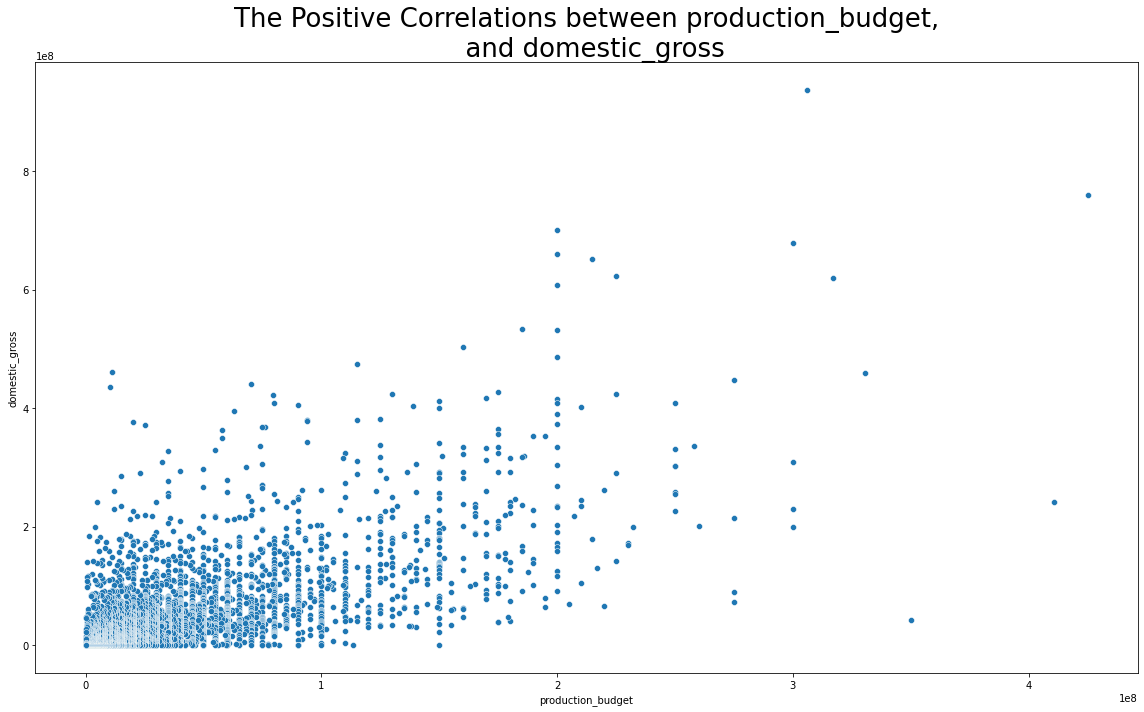

In [58]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='production_budget', y='domestic_gross', data = movie_budgets)
plt.title("The Positive Correlations between production_budget,\n  and domestic_gross", fontsize=26)
plt.tight_layout()
plt.show()

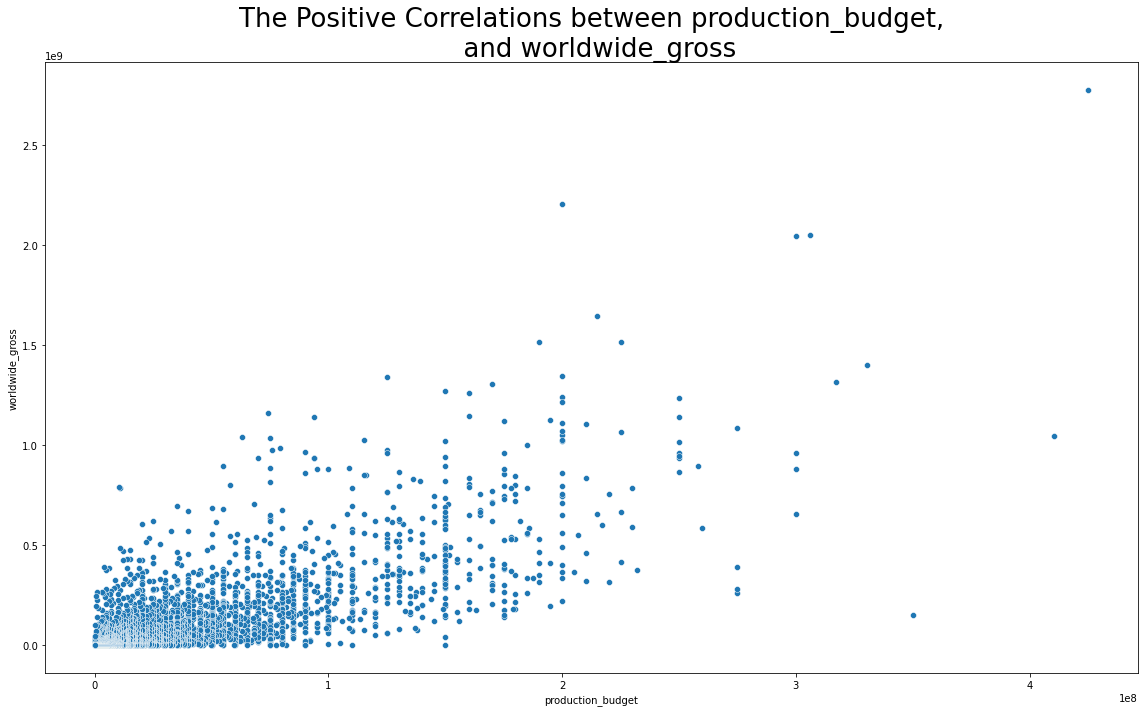

In [59]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='production_budget', y='worldwide_gross', data = movie_budgets)
plt.title("The Positive Correlations between production_budget,\n  and worldwide_gross", fontsize=26)
plt.tight_layout()
plt.show()

There is a positive correlation between the production budget and worldwide gross: 
    The scatterplot shows a general trend where movies with higher production budgets tend to have higher worldwide gross. Therefore, Microsoft company may want to consider increasing their production budget to increase their chances of higher worldwide gross
    #

In [61]:
movie_budgets['return_on_inv'] = ((movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross'] - movie_budgets['production_budget']) / movie_budgets['production_budget']).round(2)
movie_budgets.head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day,return_on_inv
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,18,7.32
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,20,2.13
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,7,-0.45
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,1,4.63
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,15,5.11
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,12,18,8.77
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,4,27,8.09
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,2007,5,24,3.24
8,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,11,17,1.95
9,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,2015,11,6,2.60


Although there is a positive correlation between production budget and worldwide gross, it is important to evaluate the return on investment (ROI) of a movie. microsoft may want to analyze the profitability of their movies by comparing the production budget to the worldwide gross and factoring in other expenses such as marketing and distribution costs.

In [63]:
movie_budgets_sample= movie_budgets.sort_values(by = 'return_on_inv', ascending= False).head(20).iloc[1:20]
movie_budgets_sample.head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day,return_on_inv
5492,93,2009-09-25,Paranormal Activity,450000.0,107918810.0,194183034.0,2009,9,25,670.34
5406,7,1999-07-14,The Blair Witch Project,600000.0,140539099.0,248300000.0,1999,7,14,647.07
5679,80,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,2015,7,10,643.21
5773,74,1993-02-26,El Mariachi,7000.0,2040920.0,2041928.0,1993,2,26,582.26
5613,14,1980-03-21,Mad Max,200000.0,8750000.0,99750000.0,1980,3,21,541.50
5709,10,2004-05-07,Super Size Me,65000.0,11529368.0,22233808.0,2004,5,7,518.43
5346,47,1942-08-13,Bambi,858000.0,102797000.0,268000000.0,1942,8,13,431.16
5715,16,1995-08-09,The Brothers McMullen,50000.0,10426506.0,10426506.0,1995,8,9,416.06
5665,66,1974-10-18,The Texas Chainsaw Massacre,140000.0,26572439.0,26572439.0,1974,10,18,378.61
5676,77,1968-10-01,Night of the Living Dead,114000.0,12087064.0,30087064.0,1968,10,1,368.95


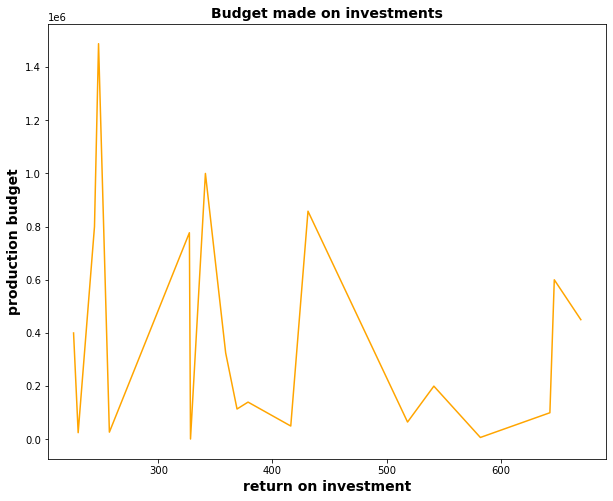

In [64]:
x = movie_budgets_sample["return_on_inv"]
y = movie_budgets_sample['production_budget'] 
plt.xlabel("return on investment", fontsize=14, fontweight='bold')
plt.ylabel("production budget", fontsize =14, fontweight= 'bold')
plt.title("Budget made on investments", fontsize=14, fontweight = 'bold')
plt.gcf().set_size_inches(10,8)
plt.plot(x,y, color = 'orange');

###the budget doesn't determine the return on investment of the movie

<AxesSubplot:xlabel='worldwide_gross', ylabel='movie'>

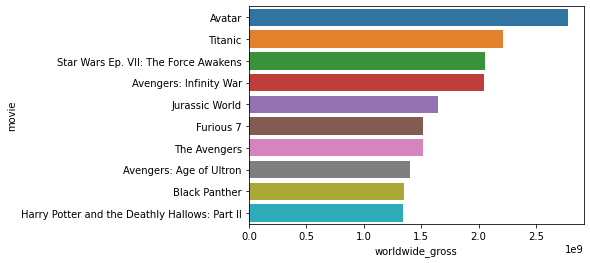

In [68]:
top_10 = movie_budgets.nlargest(10, 'worldwide_gross')
top_10_domestic = movie_budgets.nlargest(10, 'domestic_gross')
top_10_production = movie_budgets.nlargest(10, 'production_budget')

sns.barplot(x='worldwide_gross', y='movie', data=top_10, orient='h')

###

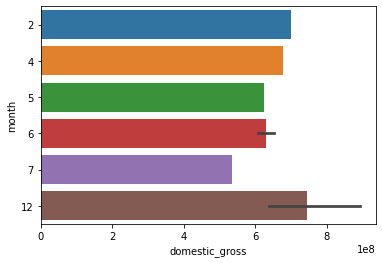

In [70]:
sns.barplot(x='domestic_gross', y='month', data=top_10_domestic, orient='h');

From the above  bar there no relation between the month for the  movie release and the domestic_gross 

# Recommendation

# im.db
##  Data Understanding 
here we going to be dealinh with im database

In [74]:
#WE CONNECT THE DATABASE
conn = sqlite3.connect("im.db")

In [75]:
#we import data from the movie basics 
movie_basic_data = pd.read_sql("""SELECT *
FROM movie_basics"""
            ,conn)
movie_basic_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [76]:
movie_basic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [77]:
# we import movie from the movie ratings
movie_ratings_data = pd.read_sql("""SELECT *
FROM movie_ratings;""",conn)
movie_ratings_data

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [78]:
movie_ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


# Connect movie basic with movie ratings

In [79]:
movie_database = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING(movie_id);""",conn)

In [80]:
movie_database

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [81]:
movie_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


the joined table contains object, float and interger as data types

# Data cleaning in im.db


In [83]:
#checking the missing values
movie_database.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [84]:
#checking any duplicated rows
movie_database.duplicated().value_counts()

False    73856
dtype: int64

In [85]:
#finding the most frequent genre
movie_database['genres'].mode()[0]

'Drama'

In [86]:
#we confirm that Drama is the most frequent Genre
movie_database['genres'].value_counts()

Drama                      11612
Documentary                10313
Comedy                      5613
Horror                      2692
Comedy,Drama                2617
                           ...  
Biography,Drama,Western        1
Comedy,Horror,War              1
Action,Family,Mystery          1
Fantasy,History,Romance        1
Comedy,History,News            1
Name: genres, Length: 923, dtype: int64

In [88]:
#we replace the missing values in the genre with the most-occuring genre(drama)
mode_movie_database = movie_database['genres'].mode()[0]
movie_database['genres'].fillna('mode_movie_database',inplace = True)


In [89]:
#we confirm if there is still missing values in the genre
movie_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [90]:
#confirming missing values in the columns after replacing the missing values in genres
movie_database.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres                0
averagerating         0
numvotes              0
dtype: int64

In [91]:
# replacing the missing values in runtimes_minutes with mean
mean_movie_database = movie_database['runtime_minutes'].mean()
movie_database['runtime_minutes'].fillna('mean_movie_database',inplace = True)

In [92]:
 movie_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  object 
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 4.5+ MB


In [93]:
# confirming no more missing values in all columns since we have replaced
movie_database.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

# Data Analysis

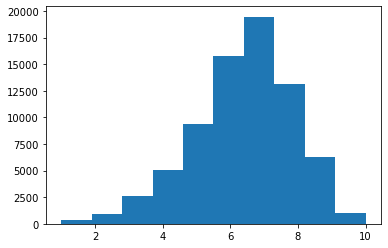

In [94]:
plt.hist(movie_database["averagerating"], bins = 10);

In [95]:
The histogram has 10 bins which represent the range of values of 'averagerating' data divided into 10 equal intervals. The x-axis represents the intervals and the y-axis shows the count of observations that fall within each bin.
The distribution of 'averagerating' appears to be slightly skewed to the right, indicating that the majority of the films have a rating of 6-8 on a scale of 1-10. hence the movies rated above 5 means the are performing well compared to  the movies rated below 5 

SyntaxError: invalid syntax (<ipython-input-95-6d8b5e1018da>, line 1)

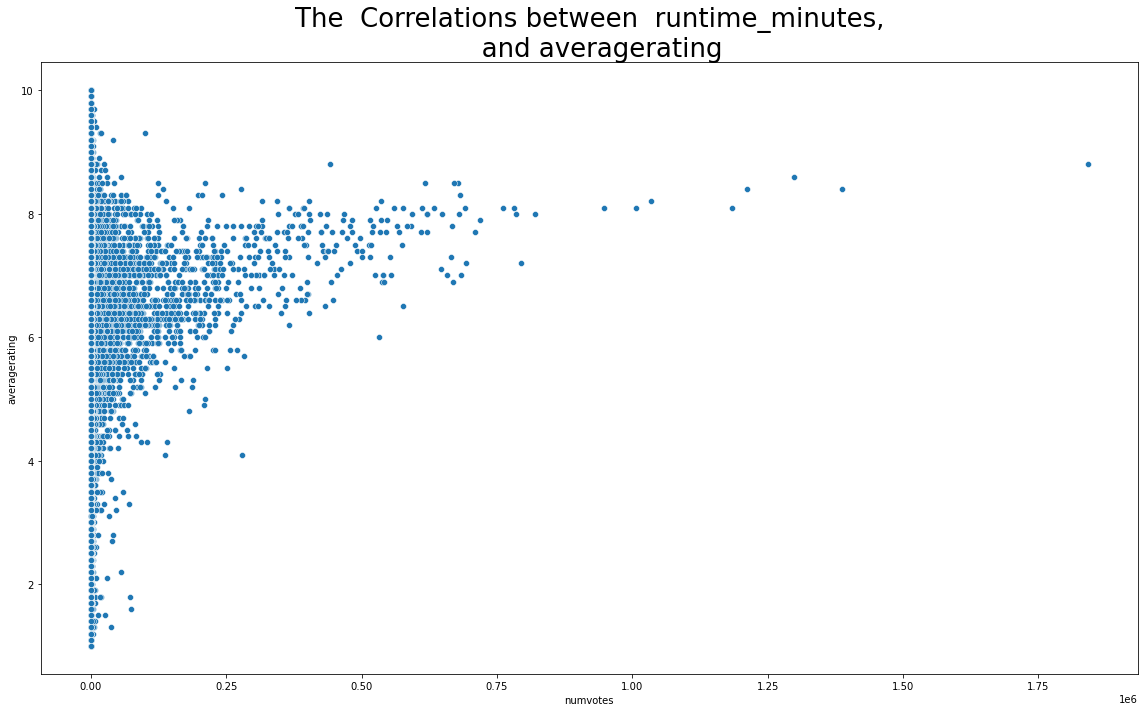

In [96]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='numvotes', y='averagerating', data = movie_database)
plt.title("The  Correlations between  runtime_minutes,\n   and averagerating", fontsize=26)
plt.tight_layout()
plt.show()

In [97]:
movie_database= pd.read_sql("""
                  SELECT primary_title, start_year, genres, averagerating, numvotes
                  FROM movie_basics AS MB
                  JOIN movie_ratings AS MR
                   ON MB.movie_id = MR.movie_id
                   WHERE numvotes > 500000 AND averagerating BETWEEN 5.5 AND 8.5
                   ORDER BY numvotes DESC
                   limit 50;
                  """, conn)
movie_database

,primary_title,start_year,genres,averagerating,numvotes
0,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
1,Django Unchained,2012,"Drama,Western",8.4,1211405
2,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655
3,The Wolf of Wall Street,2013,"Biography,Crime,Drama",8.2,1035358
4,Shutter Island,2010,"Mystery,Thriller",8.1,1005960
5,Guardians of the Galaxy,2014,"Action,Adventure,Comedy",8.1,948394
6,Deadpool,2016,"Action,Adventure,Comedy",8.0,820847
7,The Hunger Games,2012,"Action,Adventure,Sci-Fi",7.2,795227
8,Star Wars: Episode VII - The Force Awakens,2015,"Action,Adventure,Fantasy",8.0,784780
9,Mad Max: Fury Road,2015,"Action,Adventure,Sci-Fi",8.1,780910


In [98]:
genres_sorted_mean = pd.DataFrame(movie_database.groupby("genres")["numvotes"].mean()).sort_values(by="numvotes", ascending= False).head(10)
genres_sorted_mean

,numvotes
genres,
"Action,Thriller",1.387769e+06
"Drama,Western",1.211405e+06
"Biography,Crime,Drama",1.035358e+06
"Mystery,Thriller",1.005960e+06
"Action,Adventure,Comedy",7.712503e+05
"Drama,Mystery,Thriller",7.615920e+05
"Adventure,Family,Fantasy",7.196290e+05
"Drama,Sci-Fi,Thriller",7.100180e+05
"Adventure,Drama,Fantasy",6.918350e+05


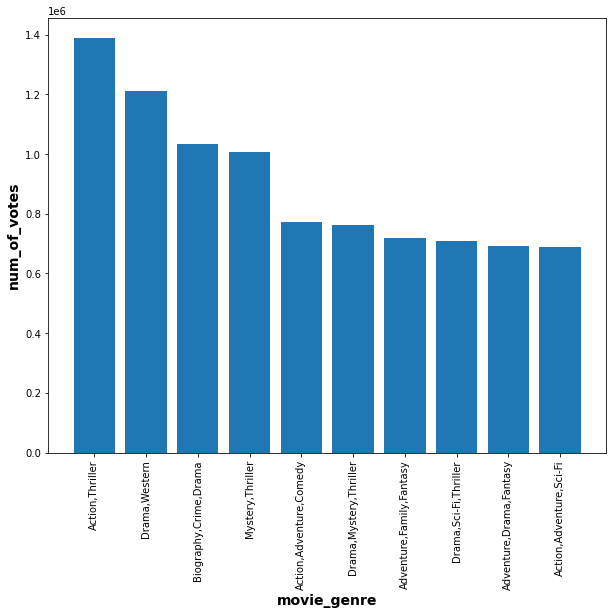

In [99]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90, fontsize=10)
y = genres_sorted_mean["numvotes"]
plt.xlabel("movie_genre", fontsize=14, fontweight='bold')
plt.ylabel("num_of_votes", fontsize =14, fontweight= 'bold')

plt.bar(y.index, y.values);

The plot is useful in identifying which movie genres are more popular among users, which can be helpful in making decisions related to marketing and distribution of movies.

# Recommendation

# NEXT STEPS

In [ ]:
DO FURTHER RESESRCH TO FIND IS THERE IS SNY RELATION BTN THE ORIG LANGUAGE AND THE POPULARITY